# EDA

за основу взял [1 занятие клуба ии в мифи](https://colab.research.google.com/drive/1V__EuSANRpZLZd5dW2H9Pgvxhllfud1x)

### Загрузим файлы, с которыми будем работать

In [1]:
import pandas as pd
train = pd.read_csv("train.csv")
commit = pd.read_csv("test.csv")

### Выделим категориальные признаки, численные и целевой признак

In [2]:
num_cols = [
    "ClientPeriod",
    "MonthlySpending",
    "TotalSpent",
]

cat_cols = [
    "Sex",
    "IsSeniorCitizen",
    "HasPartner",
    "HasChild",
    "HasPhoneService",
    "HasMultiplePhoneNumbers",
    "HasInternetService",
    "HasOnlineSecurityService",
    "HasOnlineBackup",
    "HasDeviceProtection",
    "HasTechSupportAccess",
    "HasOnlineTV",
    "HasMovieSubscription",
    "HasContractPhone",
    "IsBillingPaperless",
    "PaymentMethod",
]

churn = "Churn"

### Проанализируем данные на пустые и некорректные значения

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [4]:
commit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

Заметим, что TotalSpent представлен как object, а IsSeniorCitizen как int. Сделаем замену типов

Заменим все " " на пустые значения

In [5]:
import numpy as np

train.replace(' ', np.nan, inplace=True)
commit.replace(' ', np.nan, inplace=True)

<Axes: >

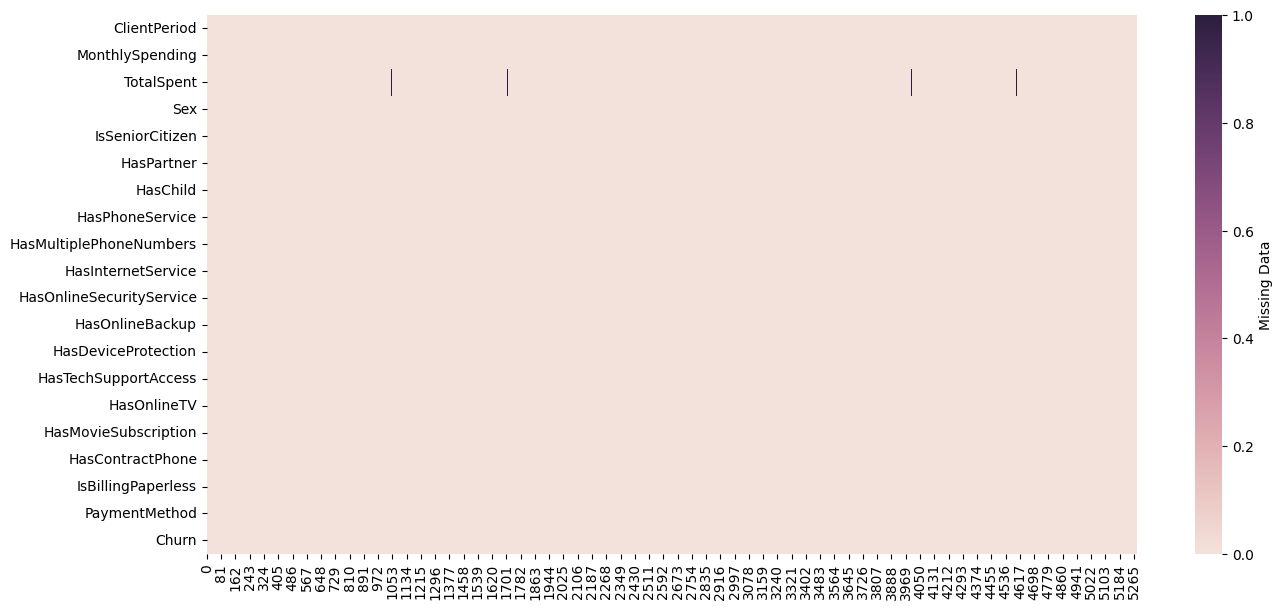

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# График распределения пропущенных значений
plt.figure(figsize=(15,7))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(train.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'})

In [7]:
print(train.isna().sum())
print(commit.isna().sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64
ClientPeriod                0
MonthlySpending             0
TotalSpent                  2
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection        


Как мы видим, пустые значения появились в totalspent. Заменим их на нули

In [8]:
train["TotalSpent"] = train["TotalSpent"].replace(np.nan, 0).astype('float')
commit["TotalSpent"] = commit["TotalSpent"].replace(np.nan, 0).astype('float')

In [9]:
print(train.info())
print(commit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Заменим для IsSeniorCitizen 0 на No, 1 на Yes

In [10]:
train.IsSeniorCitizen = train.IsSeniorCitizen.map(lambda x: "Yes" if x == 1 else "No")
commit.IsSeniorCitizen = commit.IsSeniorCitizen.map(lambda x: "Yes" if x == 1 else "No")
print(set(train.IsSeniorCitizen.to_list()))
print(set(commit.IsSeniorCitizen.to_list()))

{'Yes', 'No'}
{'Yes', 'No'}


### Проверим данные на наличие дубликатов

In [11]:
train.duplicated(keep=False).sum()

28

Получили 28 дублирующих строк. нужно их удалить

In [12]:
train.drop_duplicates(inplace=True)

Теперь посмотрим, будут ли дубликаты, если отбросить целевой признак

In [13]:
train.drop('Churn', axis=1).duplicated().sum()

8

In [14]:
train[train.drop(['Churn'], axis=1).duplicated(keep=False)].sort_values(by=[*train.columns])

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
838,1,19.65,19.65,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4811,1,19.65,19.65,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3463,1,19.75,19.75,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4294,1,19.75,19.75,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3831,1,20.00,20.00,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1647,1,20.00,20.00,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3735,1,20.20,20.20,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
3769,1,20.20,20.20,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
881,1,20.40,20.40,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1874,1,20.40,20.40,Female,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1


Осталось 8 дубликатов, при этом на одинаковых наборах признаков дающих разные целевые значения. Так как для нас приоритетнее класс "1", оставим его

In [15]:
train.drop_duplicates(subset=list(train.columns[:-1]), keep='last', inplace=True)

### Анализ числовых признаков

Распределение признаков

In [16]:
train.describe()

,ClientPeriod,MonthlySpending,TotalSpent,Churn
count,5260.000000,5260.000000,5260.000000,5260.000000
mean,32.528327,65.040875,2296.898165,0.260646
std,24.517317,30.153470,2269.107245,0.439029
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.737500,403.300000,0.000000
50%,29.000000,70.500000,1414.900000,0.000000
75%,55.000000,90.050000,3813.712500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [17]:
commit.describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,1761.000000,1761.000000,1761.000000
mean,32.293583,64.272601,2256.483135
std,24.593736,29.832517,2260.501794
min,0.000000,18.550000,0.000000
25%,9.000000,35.650000,405.600000
50%,29.000000,70.050000,1356.300000
75%,56.000000,89.400000,3759.050000
max,72.000000,117.350000,8496.700000


array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

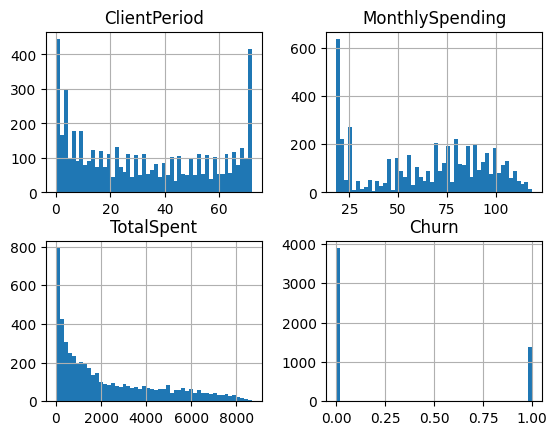

In [18]:
train.hist(bins=50)

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>, <Axes: >]], dtype=object)

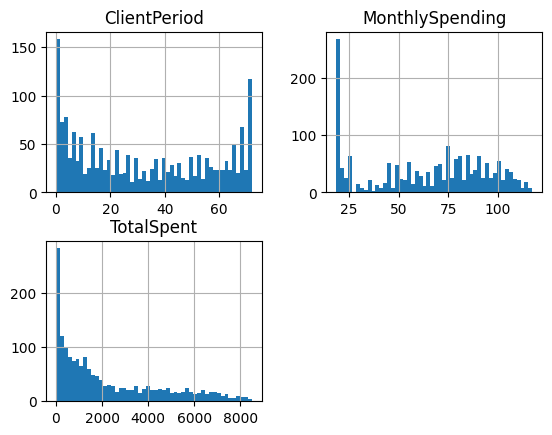

In [19]:
commit.hist(bins=50)

Гистограммы схожи, значит данные провдоподобные и сформированны не предвзято

Попробуем обнаружить взаимосвзязь между численными признаками

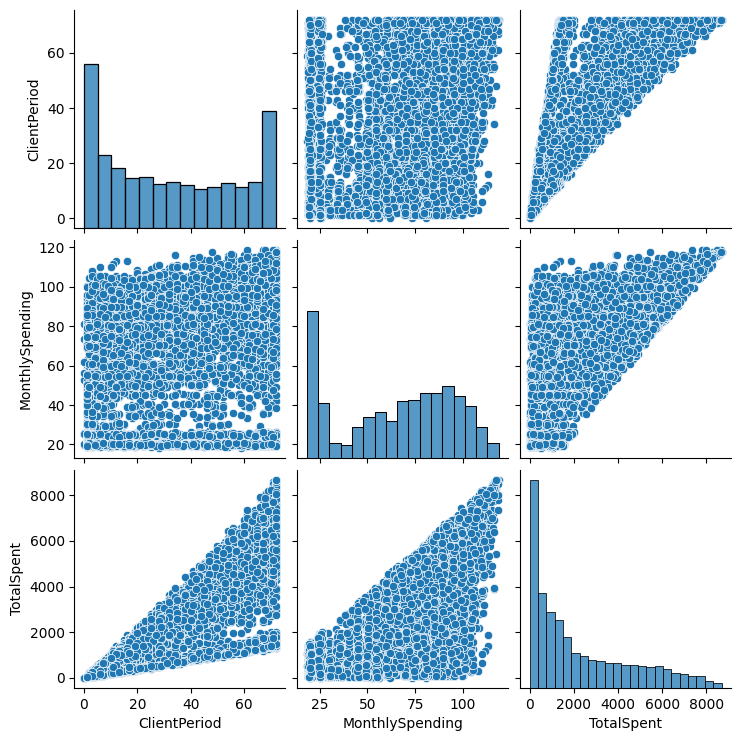

In [20]:
sns.pairplot(train[num_cols])

### Анализ категориальных признаков

Рассмотрим распределение целевой переменной по всем категориальным признакам

C:\Users\bm535\AppData\Local\Temp\ipykernel_27908\2666340111.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, fontsize=8)
C:\Users\bm535\AppData\Local\Temp\ipykernel_27908\2666340111.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, fontsize=8)
C:\Users\bm535\AppData\Local\Temp\ipykernel_27908\2666340111.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, fontsize=8)
C:\Users\bm535\AppData\Local\Temp\ipykernel_27908\2666340111.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


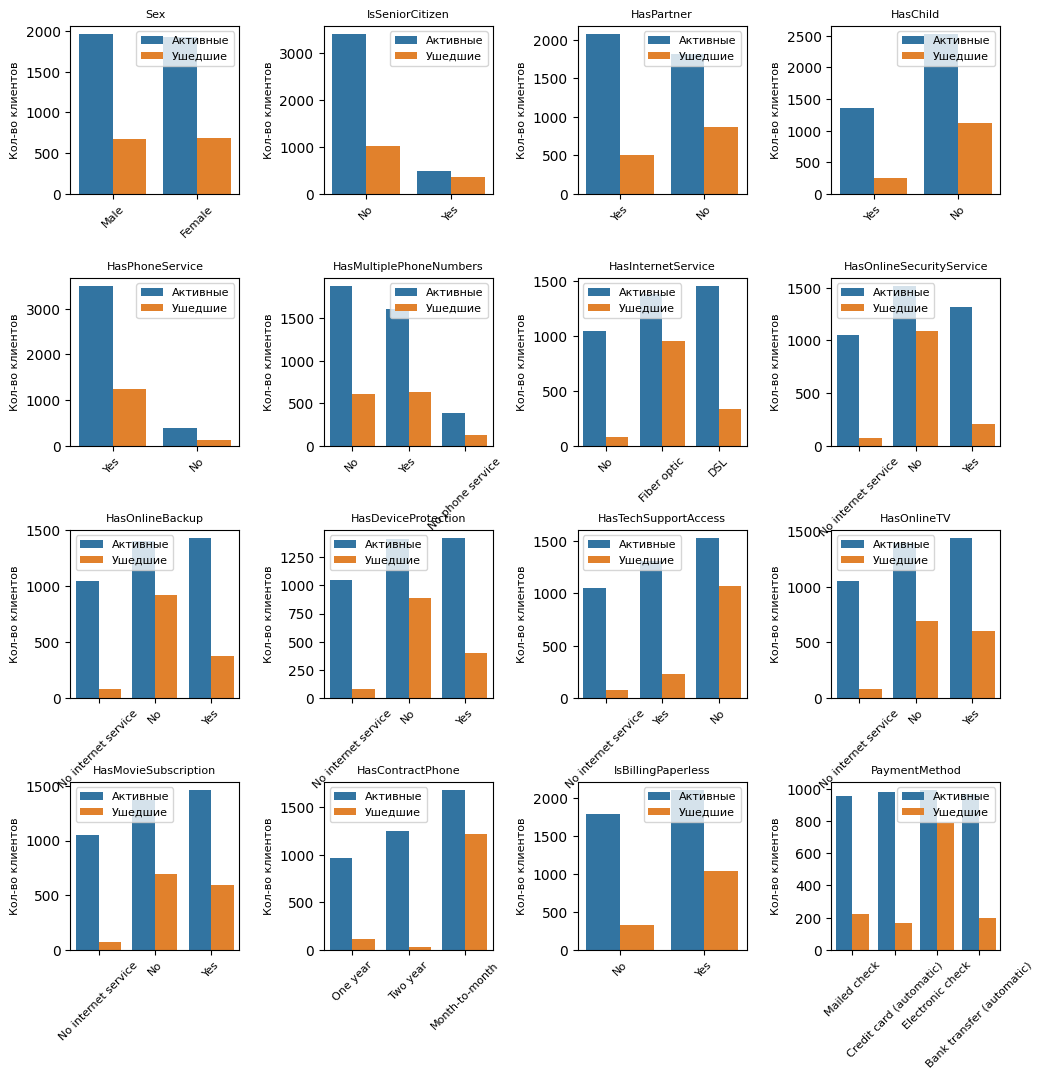

In [21]:
nrows, ncols = 4, 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,  figsize=(12, 12))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, column_name in enumerate(cat_cols):
    row = i // nrows
    col = i % ncols
    axis = axes[row, col]
    chart_title = "".join(column_name)
    sns.countplot(train, x=column_name, hue=churn, ax=axis)
    axis.set_title(chart_title, fontsize=8)
    axis.set_xlabel("")
    axis.set_ylabel("Кол-во клиентов", fontsize=8)
    axis.legend(("Активные", "Ушедшие"), fontsize=8)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=45, fontsize=8)


Заметим, что пол не влияет ни на что. уберем его

In [22]:
# from scipy.stats import chi2_contingency # нашел анализ через хи квадрат
# sex_cor = pd.crosstab(train["Sex"], train["Churn"])
# chi2_contingency(sex_cor) # pvalue > 0.05 => нет зависимости, да и значение самого chi(statistic) небольшое

In [23]:
# train.drop("Sex", axis=1, inplace=True)
# cat_cols.remove("Sex")
# commit.drop("Sex", axis=1, inplace=True)

Для обнаружения корреляций между признаками закодируем категориальные признаки методом labelencoding(чтобы за раз закодировать ordinalencoder)

In [24]:
patterns = {
    "No": 0,
    "No internet service": 0,
    "No phone service": 0,
    "Yes": 1,
    "Male": 0,
    "Female": 1,
    "DSL": 1,
    "Fiber optic": 2,
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2,
    "Credit card (automatic)": 0,
    "Bank transfer (automatic)": 1,
    "Mailed check": 2,
    "Electronic check": 3,
}

train = train.replace(patterns)

commit = commit.replace(patterns)

train.head(5)

C:\Users\bm535\AppData\Local\Temp\ipykernel_27908\4181079764.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train = train.replace(patterns)
C:\Users\bm535\AppData\Local\Temp\ipykernel_27908\4181079764.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  commit = commit.replace(patterns)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,2,0
1,72,25.85,1872.20,0,0,1,0,1,1,0,0,0,0,0,0,0,2,0,0,0
2,1,75.90,75.90,0,0,0,0,1,0,2,0,0,0,1,0,0,0,1,3,1
3,32,79.30,2570.00,1,1,1,0,1,1,2,0,0,1,0,0,0,0,0,2,0
4,60,115.25,6758.45,1,0,1,1,1,1,2,1,1,1,1,1,1,2,0,0,0


Построим хитмап для обнаружения корреляций

<Axes: >

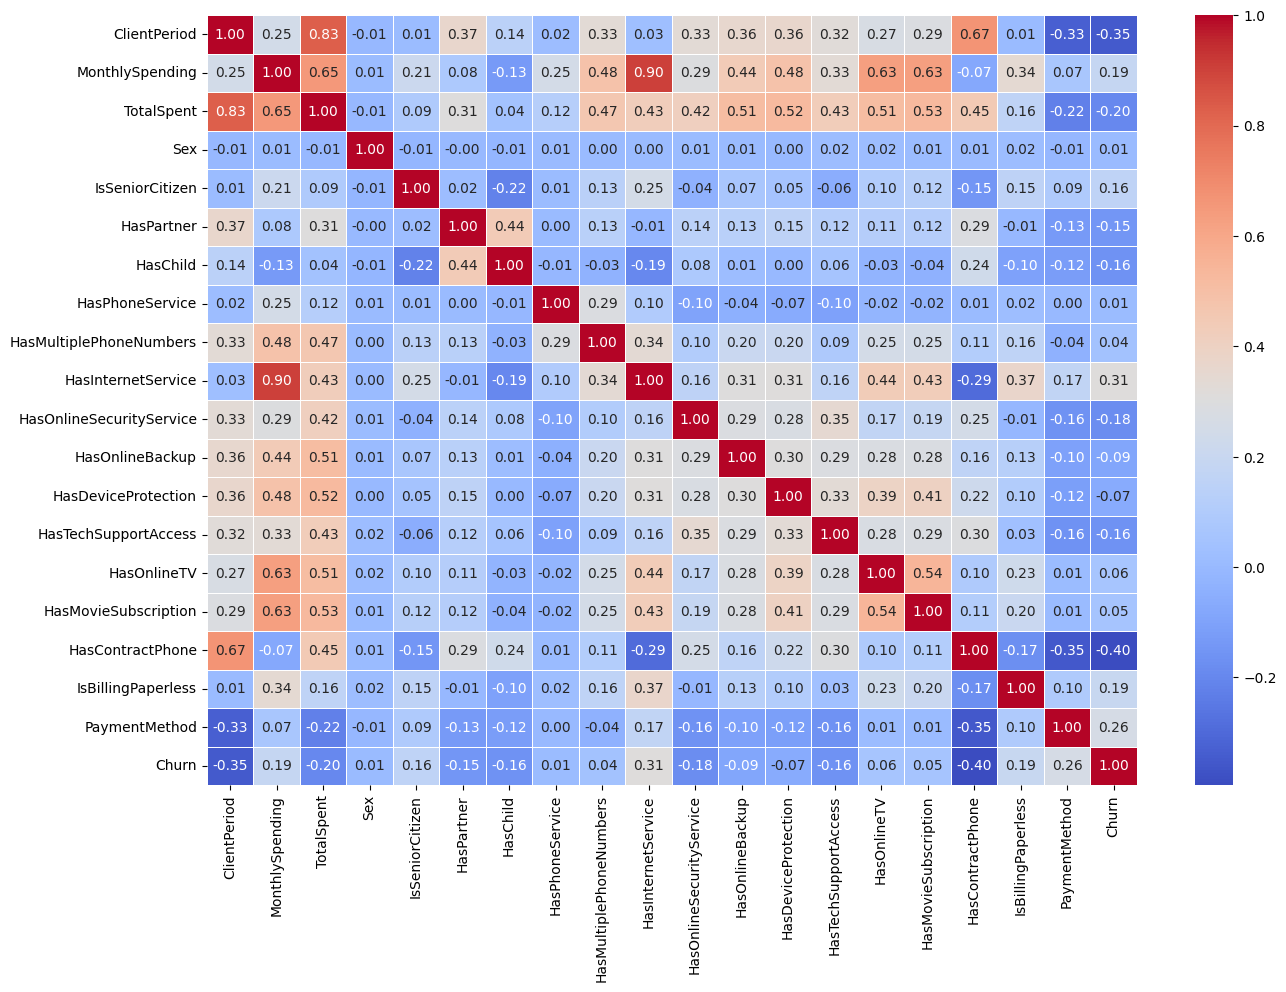

In [25]:
corr_matrix = train.corr()
fig, axes = plt.subplots(figsize=(15, 10))
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm", ax=axes, linewidth=.5, fmt=".2f")


Теперь, посмотрим распределение целевого признака 

<Axes: >

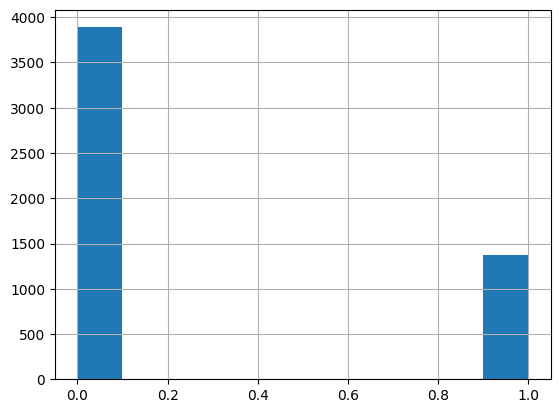

In [26]:
train[churn].hist()

Как мы видим, тут есть дисбаланс классов. Мы его исправим далее

# Подготовка данных для обучения

### Разделим обучающую выборку на обучающую и контрольную

In [27]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(train.drop(columns='Churn'), train['Churn'], test_size=0.2, shuffle=False)
train_x

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,2
1,72,25.85,1872.20,0,0,1,0,1,1,0,0,0,0,0,0,0,2,0,0
2,1,75.90,75.90,0,0,0,0,1,0,2,0,0,0,1,0,0,0,1,3
3,32,79.30,2570.00,1,1,1,0,1,1,2,0,0,1,0,0,0,0,0,2
4,60,115.25,6758.45,1,0,1,1,1,1,2,1,1,1,1,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,5,90.35,434.50,0,0,1,1,1,0,2,1,0,1,0,0,1,0,1,2
4222,17,54.60,934.80,0,0,1,0,0,0,1,0,0,1,1,1,1,1,0,3
4223,19,39.65,733.35,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,3
4224,14,100.20,1369.80,1,1,1,0,1,1,2,0,1,0,0,1,1,0,1,3


### Сгенерируем синтетические данные

In [28]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)

# train_x, train_y = smote.fit_resample(train_x, train_y)

# train_y.hist(bins=50) 

### Посмотрим на основе randomforest какие признаки вносят больший вклад в целевой признак

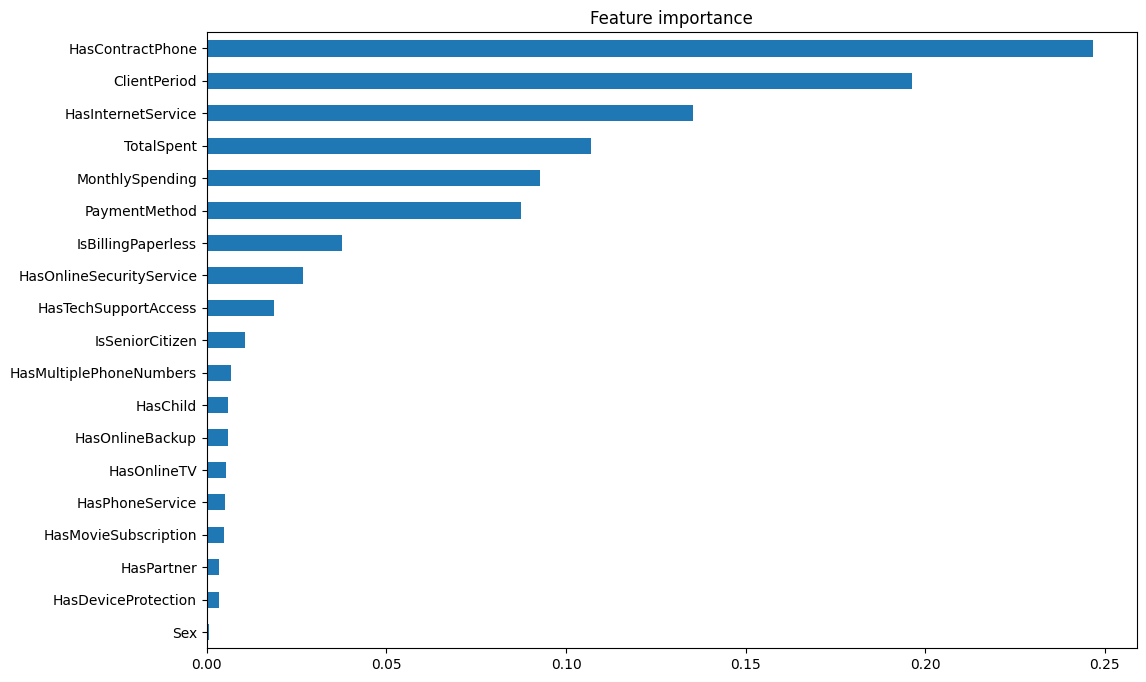

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, min_impurity_decrease=0.001)
clf.fit(train_x, train_y)
pd.DataFrame(clf.feature_importances_, index=train_x.columns, columns=["importance"]) \
    .sort_values("importance") \
    .plot(kind="barh", legend=False, figsize=(12, 8));
plt.title("Feature importance");

# Обучение моделей
Обучать будем catboost, xgboost, logisticregression так как они показали наилучший результат в ноутбуке classif. Реализацию других моделей можно будет посмотреть там

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline # для logreg

import optuna

### Логистическая регрессия

##### Обучение логистической регрессии

In [31]:
# import optuna
# from optuna.integration import catboost as ocb
# from sklearn.linear_model import LogisticRegression
# from optuna.pruners import SuccessiveHalvingPruner # обрезаем плохие модели

# from sklearn.preprocessing import StandardScaler

# def objective(trial):
#     c = trial.suggest_float('c', 0.01, 3)
#     itr = trial.suggest_int('itr', 1, 1000)
    
#     lr_model = Pipeline(steps=[
#     ("scaler", StandardScaler()),
#     ("model",LogisticRegression(penalty="l1", solver="saga", max_iter=itr, random_state=42, C=c))])

    
#     lr_model.fit(train_x, train_y)
    
#     return roc_auc_score(test_y, lr_model.predict_proba(test_x)[:, 1])

# study = optuna.create_study(direction="maximize", pruner=SuccessiveHalvingPruner())
# study.optimize(objective, n_trials=500, n_jobs=-1)

# print("Лучший ROC-AUC:", study.best_value)
# print("Лучшие параметры:", study.best_params)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


lr_model = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(penalty="l1", solver="saga", max_iter=2, C=1.494, random_state=42))])

    

lr_model.fit(train_x, train_y)


D:\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=1.494, max_iter=2, penalty='l1',
                                    random_state=42, solver='saga'))])

In [33]:
roc_auc_score(test_y, lr_model.predict_proba(test_x)[:, 1])


0.837569030032411

*Без синтетики*:

Лучший ROC-AUC: 0.8303797057500684

Лучшие параметры: {'c': 0.12956871258429378, 'itr': 3}

*Синтетика*

##### Матрица ошибок

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Text(50.722222222222214, 0.5, 'true values')

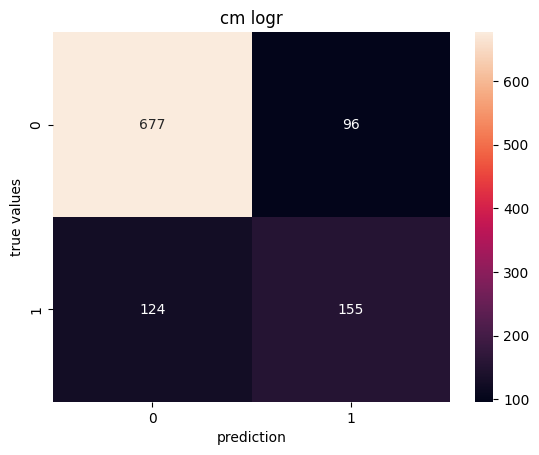

In [35]:
cm_lr = confusion_matrix(test_y ,lr_model.predict(test_x))
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.title("cm logr")
plt.xlabel('prediction')
plt.ylabel('true values')

### CatBoost

##### Обучение catboost

In [36]:
# from catboost import CatBoostClassifier

# def objective(trial):
#     params = {
#         "iterations": trial.suggest_int("iterations", 100, 1000),
#         "learning_rate": trial.suggest_float("learning_rate", 0.001, 1, log=True),
#         "depth": trial.suggest_int("depth", 3, 6),
#         "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 0.001, 10, log=True),
#         "subsample": trial.suggest_float("subsample", 0.1, 1.0),
#         "random_strength": trial.suggest_float("random_strength", 1, 100),
#         "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 300),
#         "eval_metric": "AUC",
#         "cat_features": cat_cols,
#         "logging_level": "Silent",
#         "random_seed": 42,
#         "thread_count": 8,
#         "early_stopping_rounds": 30
#     }

#     cb_model = CatBoostClassifier(**params)

#     cb_model.fit(train_x, train_y, eval_set=(test_x, test_y), verbose=False)
#     return roc_auc_score(test_y, cb_model.predict_proba(test_x)[:, 1])

# study = optuna.create_study(direction="maximize", pruner="Hyperband")
# study.optimize(objective, n_trials=400, n_jobs=-1) 

# print("Лучший ROC-AUC:", study.best_value)
# print("Лучшие параметры:", study.best_params)



In [37]:
from catboost import CatBoostClassifier

params = {'iterations': 709, 'learning_rate': 0.11620122802197938, 'depth': 6, 'l2_leaf_reg': 0.011174622609427956,
          'subsample': 0.9560699335219202, 'random_strength': 70.01911787364448, 'min_data_in_leaf': 98, "eval_metric": "AUC", 
          "cat_features": cat_cols, "logging_level": "Silent",
          "random_seed": 42, "thread_count": 8,
          "early_stopping_rounds": 30}

cb_model = CatBoostClassifier(**params)

cb_model.fit(train_x, train_y, eval_set=(test_x, test_y), verbose=100)

In [38]:
roc_auc_score(test_y, cb_model.predict_proba(test_x)[:,1])

0.8482730320354993

*С синтетикой*:

Лучший ROC-AUC: 0.80

Лучшие параметры: {'iterations': 854, 'learning_rate': 0.3725440436554638, 'depth': 5, 'l2_leaf_reg': 0.0073664786963278895, 'subsample': 0.7800626159148464, 'random_strength': 51.62177452876807, 'min_data_in_leaf': 157}

*Без синтетики*:

Лучший ROC-AUC: 0.8452730366722772

Лучшие параметры: {'iterations': 923, 'learning_rate': 0.1794104719082739, 'depth': 5, 'l2_leaf_reg': 0.04441780674925688, 'subsample': 0.9281063941220821, 'random_strength': 95.1237075024714, 'min_data_in_leaf': 253}

(без удаления признаков)
Лучший ROC-AUC: 0.8482730320354993
Лучшие параметры: {'iterations': 709, 'learning_rate': 0.11620122802197938, 'depth': 6, 'l2_leaf_reg': 0.011174622609427956, 'subsample': 0.9560699335219202, 'random_strength': 70.01911787364448, 'min_data_in_leaf': 98}

In [39]:
# cb_model.fit(train.drop(churn, axis=1), train[churn], init_model=cb_model)

##### Матрица ошибок

Text(50.722222222222214, 0.5, 'true values')

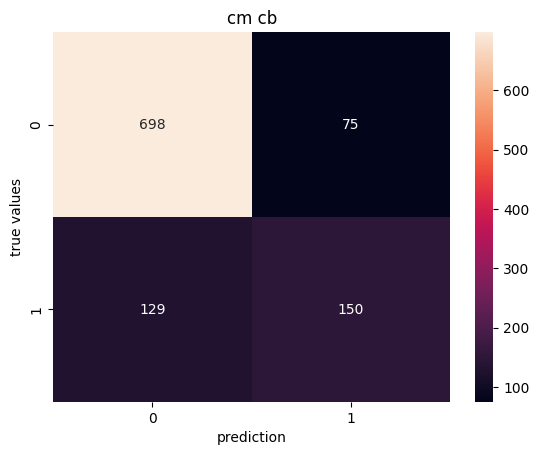

In [40]:
cm_cb = confusion_matrix(test_y ,cb_model.predict(test_x))
sns.heatmap(cm_cb, annot=True, fmt='d')
plt.title("cm cb")
plt.xlabel('prediction')
plt.ylabel('true values')

### XGBoost

##### Обучение XGBoost(используем optuna)

In [41]:
# import optuna
# from optuna.integration import xgboost as xgb
# from xgboost import XGBClassifier

# def objective(trial):
#     eta = trial.suggest_float('eta', 0.01, 1)
#     dpt = trial.suggest_int('dpt', 2, 5)
#     max_cat = trial.suggest_int('mcat', 1, 5)
#     n_est = trial.suggest_int('nest', 50, 400)
#     max_lvs = trial.suggest_int('mlvs', 1, 7)

#     xgb = XGBClassifier(n_jobs=-1, eta=eta,
#                         n_estimators=n_est, max_leaves=max_lvs,
#                              max_cat_threshold=max_cat, max_depth=dpt, early_stopping_rounds=30)
    
    
#     xgb_model = xgb.fit(train_x, train_y,
#                         eval_set=[(test_x, test_y)], verbose=False)
#     return roc_auc_score(test_y, xgb_model.predict_proba(test_x)[:,1])

# study = optuna.create_study(direction="maximize", pruner="Hyperband")
# study.optimize(objective, n_trials=700, n_jobs=-1)

# print("Лучший ROC-AUC:", study.best_value)
# print("Лучшие параметры:", study.best_params)


In [42]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_jobs=-1, eta=0.501,
                    n_estimators=223, max_leaves=7,
                    max_cat_threshold=1, max_depth=5)

xgb_model.fit(train_x, train_y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.501, eval_metric=None,
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=1, max_cat_to_onehot=None, max_delta_step=None,
              max_depth=5, max_leaves=7, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=223,
              n_jobs=-1, ...)

In [43]:
roc_auc_score(test_y, xgb_model.predict_proba(test_x)[:,1])

0.8174778709770154

*Без синтетики*:

Лучший ROC-AUC: 0.8467289849629289

Лучшие параметры: {'eta': 0.5798908933711464, 'dpt': 4, 'mcat': 1, 'nest': 305, 'mlvs': 5}

(Без удаления признаков)

Лучший ROC-AUC: 0.846397455336236

Лучшие параметры: {'eta': 0.5011118483739145, 'dpt': 5, 'mcat': 1, 'nest': 223, 'mlvs': 7}

*Синтетика*

Лучший ROC-AUC: 0.8370798499538641

Лучшие параметры: {'eta': 0.36064319809710566, 'dpt': 3, 'mcat': 5, 'nest': 237, 'mlvs': 3}


In [44]:
# xgb_model.fit(train.drop(churn, axis=1), train[churn])

##### Матрица ошибок

Text(50.722222222222214, 0.5, 'true values')

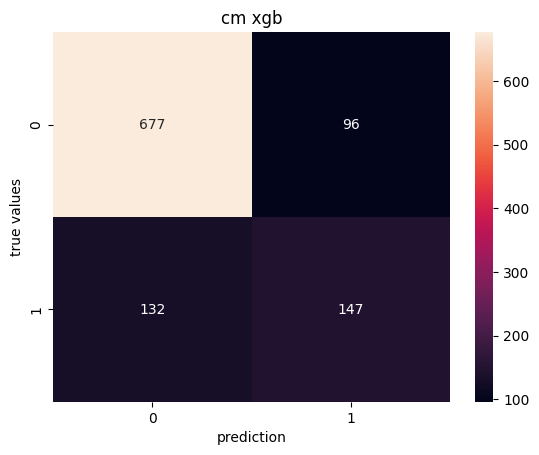

In [45]:
cm_xgb = confusion_matrix(test_y ,xgb_model.predict(test_x))
sns.heatmap(cm_xgb, annot=True, fmt='d')
plt.title("cm xgb")
plt.xlabel('prediction')
plt.ylabel('true values')

### Стекинг

##### Сборка стека

In [47]:
from sklearn.ensemble import StackingClassifier

st_xgb = XGBClassifier(n_jobs=-1, eta=0.501,
                    n_estimators=223, max_leaves=7,
                    max_cat_threshold=1, max_depth=5)

params = {'iterations': 709, 'learning_rate': 0.11620122802197938, 'depth': 6, 'l2_leaf_reg': 0.011174622609427956,
          'subsample': 0.9560699335219202, 'random_strength': 70.01911787364448, 'min_data_in_leaf': 98, "eval_metric": "AUC", 
          "cat_features": cat_cols, "logging_level": "Silent",
          "random_seed": 42, "thread_count": 8,
          "early_stopping_rounds": 30}

st_cb = CatBoostClassifier(**params)


st_lr = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(penalty="l1", solver="saga", max_iter=2, C=1.494, random_state=42))])



stack_model = StackingClassifier(estimators=[('xgb', st_xgb), ('cb', st_cb)],
                                 final_estimator=st_lr)

stack_model.fit(train_x, train_y)

D:\pythonProject\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eta=0.501, eval_metric=None,
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interac...
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=7,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=223, n_jobs=-1, ...)),
                               ('cb',
                                <catboost.core.CatBoostClassifier object at 0x000001FE9A07A490>)],
                   final_estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                                   ('model',
                                                    LogisticRegression(C=1.494,
                                                                       max_iter=2,
                                                                       penalty='l1',
                                                                       random_state=42,
                                                                       solver='saga'))]))

In [49]:
roc_auc_score(test_y, stack_model.predict_proba(test_x)[:,1])

0.8259817218211409

##### Матрица ошибок

Text(50.722222222222214, 0.5, 'true values')

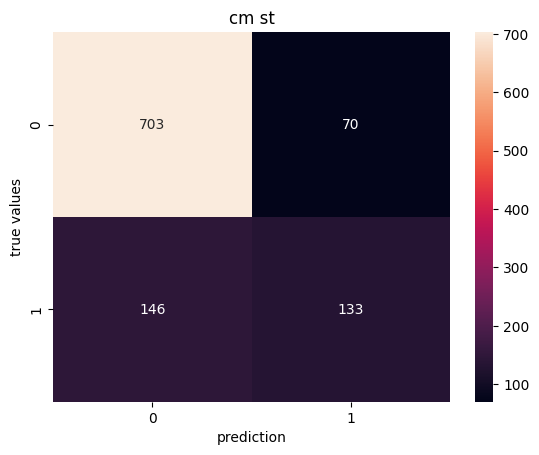

In [51]:
cm_st = confusion_matrix(test_y ,stack_model.predict(test_x))
sns.heatmap(cm_st, annot=True, fmt='d')
plt.title("cm st")
plt.xlabel('prediction')
plt.ylabel('true values')

# Обработка результатов для отправки

### Линейная регрессия

In [ ]:
lr_commit_predict = lr_model.predict_proba(commit)[:,1]

submission = pd.DataFrame({"Id": commit.index,
                          'Churn':lr_commit_predict})
submission.to_csv('submission_logr.csv', index=False)

### CatBoost

In [ ]:

cb_commit_predict = cb_model.predict_proba(commit)[:,1]

submission = pd.DataFrame({"Id": commit.index,
                          'Churn':cb_commit_predict})
submission.to_csv('submission_cb.csv', index=False)

### XGBoost

In [ ]:
xgb_commit_predict = xgb_model.predict_proba(commit)[:,1]

submission = pd.DataFrame({"Id": commit.index,
                          'Churn':xgb_commit_predict})
submission.to_csv('submission_xgb.csv', index=False)

### Stacking

In [52]:
st_commit_predict = stack_model.predict_proba(commit)[:,1]

submission = pd.DataFrame({"Id": commit.index,
                          'Churn': st_commit_predict})
submission.to_csv('submission_st.csv', index=False)